# Data Analytics: How To Enhance Effectiveness of Bank Marketing Campaign
### Created By : Monika Pangestu

## Business Problem Understanding

#### Prolog/Context

Semakin hari teknologi mulai memberikan dampak besar pada setiap aspek kehidupan manusia. Termasuk di dalamnya adalah aspek finansial. Saat dulu, untuk dapat mempromosikan produknya, bank-bank yang ada cenderung menggunakan campaign tradisional seperti telemarketing. Namun, tak dapat dipungkiri, saat ini pun campaign tradional tersebut masih kita rasakan di zaman yang serba maju ini. Tidak sedikit bank yang masih menelpon customernya untuk menawarkan produk-produk mereka. Dan tidak jarang juga orang-orang menolak produk mereka saat proses penawaran.

Dalam setiap proses penawaran pastinya juga ada biaya yang harus dikeluarkan oleh bank tersebut untuk menarik customernya. Namun, seperti yang sudah disebutkan sebelumnya tidak dapat disangkal bahwa pasti akan ada proses penawaran yang gagal dan ini membuat biaya yang dikeluarkan oleh bank (untuk campaign) terbuang sia-sia.

Dewasa ini, campaign yang dapat dilakukan oleh bank tidak hanya sekedar tele-marketing saja. Sebagai contohnya , sebuah bank dapat melakukan campaign gamification, membuat social media , AI Chatbots, dll. yang lebih menarik. Di sisi lain bank juga menggunakan metode-metode tersebut untuk meningkatkan customer engagementnya. Namun, campaign menarik saja belum cukup. Campaign harus dapat ditujukan kepada customer yang tepat. Dengan begitu campaign dapat berjalan dengan efektif dan efisien. Kemungkinan customer tertarik pada produk yang ditawarkan juga menjadi lebih besar.

Bank retail memiliki concern untuk mengetahui customer mana yang benar-benar tertarik untuk menggunakan produk long term deposit. Hal ini dilakukan untuk memaksimalkan campaign yang mereka lakukan. Dengan begitu campaign dapat dilakukan secara efektif dan efisien. Dengan mengetahui customer mana yang memiliki peluang terbesar untuk menggunakan produk deposit, bank dapat melakukan campaign yang lebih tepat sasaran pada customer yang memang tertarik.

#### Problem

Campaign yang dilakukan oleh bank belum dimanfaatkan semaksimal & se-efektif mungkin untuk meningkatkan jumlah customer yang melakukan deposit. Bank belum menargetkan campaign kepada customer yang tepat (yang memang melakukan deposit). 
Pola bank yang melakukan campaign kepada pada semua customer tanpa melakukan penyaringan terlebih dahulu, cenderung membuat semua sumber daya (biaya & sdm) dan waktu yang tersedia terbuang percuma. 

Dalam artian, jika bank melakukan campaign juga terhadap customer yang kemungkinannya kecil melakukan deposit, sumber daya akan terbuang sia-sia, karena pada akhirnya customer tersebut tidak melakukan deposit. Dimana sebenarnya, sumber daya yang hilang tersebut bisa digunakan untuk menyasar customer lain yang peluangnya lebih besar untuk melakukan deposit

#### Aim

1. Bank dapat memprediksi customer yang mungkin melakukan deposit, sehingga bank dapat memaksimalkan campaign yang dilakukan secara tepat sasaran.
2. Bank dapat mengetahui faktor-faktor apa yang dapat mempengaruhi keputusan customer untuk melakukan deposit atau tidak, sehingga bank dapat membuat campaign yang lebih efektif.

## Data Understanding

#### Data Source

**Data Info - Data_bank_marketing_campaign.csv**

Data diambil dari :
https://drive.google.com/file/d/1PQTTWgITANg5Av-1Ot28KCIHVyFaCmUK/view?usp=sharing
<br>yang merupakan adaptasi dari Kaggle : Bank Marketing Dataset (https://www.kaggle.com/datasets/janiobachmann/bank-marketing-dataset?datasetId=4471&sortBy=voteCount), dengan sedikit penyesuaian pada komponen data.

**Native Data Info - Bank Marketing Dataset**
<br>Author : S.Moro, P.Cortez & P.Rita
<br>Year : 2014, June
<br>Source : [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

**Data Attribute Information**
<br> Data data_bank_marketing_campaign.csv terdiri atas beberapa atribut, dan atribut-atribut ini dapat digunakan dalam proses analisis lebih lanjut terhadap behaviour dari customer dalam melakukan deposit. Detail dari atributnya adalah sebagai berikut :

| Attribute | Data Numeric/Categorical | Description |
| --- | --- | --- |
| age | Numeric | Umur dari customer |
| job | Categorical | Pekerjaan dari customer |
| balance | Numeric | Jumlah tabungan yang dimiliki individual |
| housing | Categorical | Apakah customer memiliki cicilan rumah ? <YES/NO> |
| loan | Categorical | Apakah customer memiliki cicilan rumah ? <YES/NO> |
| contact | Categorical | Tipe komunikasi yang dilakukan |
| month | Categorical | Bulan terakhir kontak dalam tahun terkait |
| campaign | Numeric | Jumlah kontak yang dilakukan selama campaign terhadap customer terkait |
| pdays | Numeric | Jumlah hari yang telah berlalu setelah klien terakhir dihubungi dari campaign sebelumnya <br><-1, berarti client belum pernah dikontak sebelumnya> |
| poutcome | Categorical | Hasil dari marketing campaign sebelumnya |
| deposit | Categorical | Apakah customer melakukan deposit ? <YES/NO> |

## Import Library

In [105]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
pd.set_option('display.max_colwidth', None)
import numpy as np

from sklearn.preprocessing import OneHotEncoder,  LabelEncoder
import category_encoders as ce
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import StratifiedKFold,train_test_split,cross_val_score,GridSearchCV
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import pickle

import warnings
warnings.filterwarnings('ignore')

## Read The Data

In [106]:
df = pd.read_csv("data_bank_marketing_campaign.csv")
df.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,no
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,yes
7,36,technician,911,yes,yes,cellular,may,2,21,failure,yes
8,35,management,805,no,no,cellular,sep,1,-1,unknown,no
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,no


Target pada data ini adalah kolom deposit. Pada data ini, target masih berupa Yes/No dan agar lebih mudah serta dapat diproses lebih lanjut, kolom deposit dirubah terlebih dahulu dengan keterangan sebagai berikut (default) :
<br> 0 = Customer tidak melakukan deposit (No)
<br> 1 = Customer melakukan deposit (Yes)

Berikut untuk proses & hasil perubahannya :

In [107]:
df['deposit'] = LabelEncoder().fit_transform(df['deposit'])
df.head(10)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
5,41,admin.,-76,yes,no,cellular,apr,1,-1,unknown,0
6,37,admin.,4803,no,no,cellular,jan,2,-1,unknown,1
7,36,technician,911,yes,yes,cellular,may,2,21,failure,1
8,35,management,805,no,no,cellular,sep,1,-1,unknown,0
9,57,housemaid,0,no,no,unknown,jun,1,-1,unknown,0


In [108]:
# Features Describe Data Numeric
df.describe()

,age,balance,campaign,pdays,deposit
count,7813.000000,7813.000000,7813.000000,7813.000000,7813.000000
mean,41.257264,1512.448611,2.519775,51.408550,0.477665
std,11.919710,3089.291831,2.727001,108.072739,0.499533
min,18.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,127.000000,1.000000,-1.000000,0.000000
50%,39.000000,549.000000,2.000000,-1.000000,0.000000
75%,49.000000,1684.000000,3.000000,40.000000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,1.000000


In [109]:
# Features Describe Data Categorical
df.describe(exclude = np.number)

,job,housing,loan,contact,month,poutcome
count,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4
top,management,no,no,cellular,may,unknown
freq,1792,4140,6789,5628,1976,5819


In [110]:
# Cek List Kategori masing-masing feature yang tergolong categorical data
listItem = []
for col in df.columns :
    if df[col].dtype=='object' or df[col].dtype=='category' :
        listItem.append([col, df[col].dtype, df[col].isna().sum(),
                        df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'ListCategory'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,unique,ListCategory
0,job,object,0,12,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]"
1,housing,object,0,2,"[no, yes]"
2,loan,object,0,2,"[no, yes]"
3,contact,object,0,3,"[cellular, telephone, unknown]"
4,month,object,0,12,"[jun, apr, may, nov, jan, sep, feb, mar, aug, jul, oct, dec]"
5,poutcome,object,0,4,"[unknown, other, failure, success]"


## Data Cleaning & Feature Engineering

Sebelum melakukan proses analisis lebih lanjut, ada baiknya data pada tabel tersebut dicek terlebih dahulu apakah layak untuk dilanjutkan ke tahap analisis atau butuh dimanipulasi. <br>**Mengapa demikian ?** Karena kita tidak ingin proses analisis me-lead ke pengambilan keputusan yang kurang tepat hanya karena data yang digunakan kualitasnya kurang

#### 1. Cek Data Null & Tipe Data

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   int32 
dtypes: int32(1), int64(4), object(6)
memory usage: 641.0+ KB


In [112]:
# Cek jumlah null pada dataframe
df.isnull().sum()

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

###### **Summary**
Berdasarkan hasil cek data null & tipe data di atas, dapat disimpulkan bahwa data data_bank_marketing_campaign.csv tidak terdapat nilai null dan tipe data dari masing-masing kolom telah sesuai. Hal ini tampak dari pengecekan jumlah null dari masing-masing kolom bernilai 0 dan dilihat dari kolom Dtype untuk masing-masing kolom telah sesuai.

#### 2. Cek Outliers

In [113]:
def outlier(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    below = q1 - 1.5 * iqr
    above = q3 + 1.5 * iqr
    idx_outlier = df[(df[col] > above) | (df[col] < below)].index
    return idx_outlier

In [114]:
df_outlier= pd.DataFrame(columns=['Column', 'Num of Outliers', 'Outliers(%)'])

for i in ['balance']:
    df_outlier= df_outlier.append({'Column': i, 'Num of Outliers': len(outlier(i)),'Outliers(%)': f'{round(len(outlier(i))/len(df)*100,2)} %'}, ignore_index=True)

df_outlier

,Column,Num of Outliers,Outliers(%)
0,balance,736,9.42 %


###### **Summary**
Berdasarkan hasil cek outliers di atas, dapat disimpulkan bahwa pada data data_bank_marketing_campaign.csv untuk kolom balance terdapat nilai outliers sebesar 9.42%. Namun, outliers tersebut tidak dihilangkan karena angka outliers tersebut adalah angka murni dan bukan kesalahan input data serta nilai outliers tersebut hanya sebesar 9.42% saja terhadap data total (tidak terlalu besar).

#### 2. Cek Balance Target (Deposit)

In [115]:
df.deposit.value_counts()/df.deposit.count()

0    0.522335
1    0.477665
Name: deposit, dtype: float64

###### **Summary**
Berdasarkan hasil cek balance terhadap nilai target (deposit), dapat terlihat bahwa antara customer yang melakukan deposit (1) dan yang tidak melakukan deposit (0) memiliki persentase sebesar 47% & 52%. Keduanya dapat dikatakan berimbang karena nilai keduanya tidak terlalu jauh berbeda. Dapat kita simpulkan juga bahwa kemungkinan terjadinya bias pada nilai data sangat kecil.

#### Summary Poin 1&2
<code>Berdasarkan cek data null, cek tipe data, cek outliers & cek balance yang telah dilakukan diatas dapat disimpulkan data_bank_marketing_campaign.csv tidak memerlukan proses cleaning data</code>

#### 3. EDA

Ingin dilihat apakah terdapat korelasi antar variabel yang ada pada data. Pengecekan dilakukan menggunakan correlation matrix sebagai berikut:

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'balance'),
  Text(0, 2.5, 'campaign'),
  Text(0, 3.5, 'pdays'),
  Text(0, 4.5, 'deposit')])

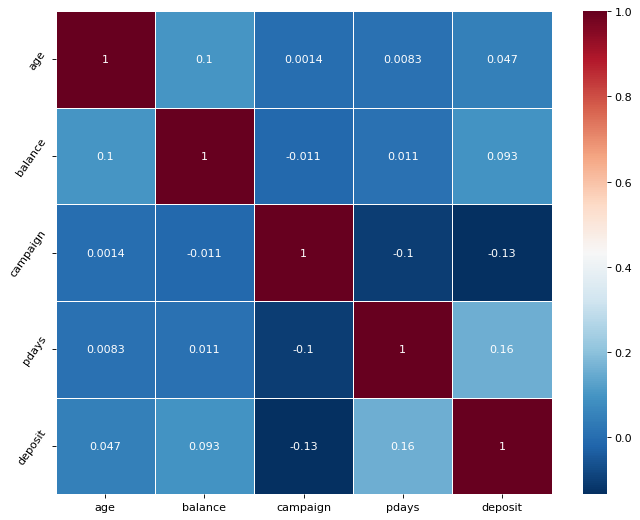

In [116]:
plt.figure(figsize=(10,8),dpi=80)
sns.heatmap(df.corr(),cmap="RdBu_r",annot=True,linewidth=0.5)
plt.yticks(rotation=55)

###### **Summary**
Berdasarkan hasil cek correlation menggunakan matrix correlation dapat kita tarik beberapa kesimpulan :
1. Terdapat korelasi positif antara pdays dengan deposit, dengan korelasi sebesar 16%. Ini berarti semakin banyak jumlah hari dari client terakhir dikontak terkait campaign maka semakin besar peluang customer untuk melakukan deposit.
2. Terdapat korelasi negatif antara campaign dengan deposit, korelasinya sebesar -13%. Ini berarti semakin banyak jumlah kontak yang dilakukan terkait campaign maka semakin kecil peluang customer untuk melakukan deposit.
3. Variable lainnya dianggap tidak saling berkorelasi karena nilai korelasinya <10%

In [117]:
df.month.value_counts()

may    1976
aug    1085
jul    1050
jun     857
apr     662
nov     657
feb     534
oct     286
jan     227
sep     212
mar     199
dec      68
Name: month, dtype: int64

Berdasarkan info tersebut dapat terlihat bahwa, customer banyak menerima kontak di bulan mei, agustus & juli

In [118]:
interval_range = pd.interval_range(start=0, freq=25, end=100)
df['age_interval'] = pd.cut(df['age'], bins=[0, 25, 50, 75, float('Inf')], labels=['0-25', '26-50', '51-75', '76-100'])
df.age_interval.value_counts()

26-50     5779
51-75     1621
0-25       307
76-100     106
Name: age_interval, dtype: int64

Berdasarkan informasi diatas, dapat kita tangkap bahwa untuk customer bank kebanyakan memiliki umur di rentas 26-50 tahun. Dan yang kedua tertinggi memiliki interval umur 51-75 tahun.

#### 5. Stratified Data & Splitting Dataset Train - Test

Data pertama-tama di-stratified menggunakan function stratifiedShuffleSplit. Function tersebut merupakan penggabungan ShuffleSplit & StratifiedKFold. Digunakan function ini untuk menjaga proporsi class pada training set & test set sama.

In [119]:
df.drop(['age_interval'],axis=1, inplace=True) #Drop kolom age_interval karena tidak dibutuhkan dalam proses pemodelan
sss=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(df.drop("deposit",axis=1), df.deposit):
    traindf=df.loc[train_index]
    testdf= df.loc[test_index]

#### 6. Encoding

Sebelum melakukan modeling, data yang tergolong kedalam categorical harus terlebih dahulu di-encoding ke dalam bentuk numeric. Dengan begitu data dapat diproses lebih lanjut oleh machine learning.
<br> Sebelumnya kita telah melakukan encoding pada variable target (deposit), sekarang kita lakukan encoding pada variable independen yang tergolong categorical.

In [120]:
df=pd.get_dummies(df)
df

,age,balance,campaign,pdays,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,55,1662,2,-1,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,39,-3058,3,-1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,51,3025,1,352,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,38,-87,1,-1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,36,205,4,-1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7808,62,2,1,-1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
7809,48,5473,2,184,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7810,36,179,8,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7811,31,54,1,-1,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## Independent & Dependent Variable

Masing-masing var independen & dependen dari kedua data set (Train & Test) kemudian didefinisikan. x merupakan var independen dan y merupakan var dependen.

In [121]:
for train_index, test_index in sss.split(df.drop("deposit",axis=1), df.deposit):
    traindf=df.loc[train_index]
    testdf= df.loc[test_index]

xtrain=traindf.drop('deposit', axis=1)
ytrain=traindf.deposit

xtest=testdf.drop('deposit', axis=1)
ytest=testdf.deposit

## Data Modelling

Kemudian kita mulai mencoba membangun model menggunakan beberapa ML algorithma tipe classifier supervised. Kemudian setiap model ML tersebut dibandingkan performa-nya untuk melihat model mana yang paling cocok untuk digunakan. Berikut untuk prosesnya:

####  1. Random Forest

Random Forest merupakan algoritma supervised. Random forest mengkombinasikan masing-masing tree yang baik menjadi 1 model. Model ini bersifat robust dan mudah digunakan. 

Random Forest memiliki beberapa keunggulan:
<br>1. Mengurangi resiko terjadinya ovefitting
<br>2. Lebih flexible (dapat handle classification ataupun regression dengan akurasi yang tinggi)
<br>3. Mudah dalam menentukan feature importance
<br>4. Algoritma yang paling banyak digunakan

Reference : 
1. https://machinelearning.mipa.ugm.ac.id/2018/07/28/random-forest/
2. https://builtin.com/data-science/random-forest-algorithm

In [122]:
rf= RandomForestClassifier(random_state=1)
pg_rf={'n_estimators': [100,200,300],'max_depth': [20,40,50]}

gs_rf=GridSearchCV(estimator= rf,
               param_grid= pg_rf,
               scoring='accuracy',
               cv=2)

#combine grid cross validation
gs_rf_scores = cross_val_score(gs_rf, X=xtrain, y=ytrain, cv=5,scoring='accuracy', n_jobs=-1)

# fitting
gs_rf.fit(xtrain, ytrain)
gs_rf_best=gs_rf.best_estimator_
gs_rf_best.fit(xtrain, ytrain)

print('Akurasi data train:   {0:.1f}%'.format(gs_rf.score(xtrain, ytrain)*100))
print('Akurasi Mean Cross Validation: {0:.1f}%'.format(np.mean(gs_rf_scores)*100))
print('Akurasi data test:    {0:.1f}%'.format(gs_rf.score(xtest, ytest)*100))

Akurasi data train:   96.4%
Akurasi Mean Cross Validation: 71.4%
Akurasi data test:    71.1%


####  2. KNN

K-Nearest Neighbor merupakan algortima instance-based & non-parametric. 
<br>Non-Parametric -> tidak terdapat parameter tertentu
<br>Instance-based -> Memorize training dataset

KNN bekerja dengan mencari K-nearest neighbor dari sampel baru berdasarkan jarak metric dan membuat prediksi

In [123]:
# pipeline combine transformers & estimator
pipe_knn= make_pipeline(StandardScaler(), KNeighborsClassifier())
 
# choose best combine hyperparameter
gs_knn=GridSearchCV(estimator= pipe_knn,
               param_grid={'kneighborsclassifier__n_neighbors':[4,5,6,7]},
               scoring='accuracy',
               cv=10)

#combine grid cross validation
gs_knn_scores = cross_val_score(gs_knn, X=xtrain, y=ytrain, cv=5,scoring='accuracy', n_jobs=-1)

# fitting
gs_knn.fit(xtrain, ytrain)
gs_knn_best=gs_knn.best_estimator_
gs_knn_best.fit(xtrain, ytrain)

print('Akurasi data train:   {0:.1f}%'.format(gs_knn.score(xtrain, ytrain)*100))
print('Akurasi Mean Cross Validation: {0:.1f}%'.format(np.mean(gs_knn_scores)*100))
print('Akurasi data test:    {0:.1f}%'.format(gs_knn.score(xtest, ytest)*100))

Akurasi data train:   75.9%
Akurasi Mean Cross Validation: 68.2%
Akurasi data test:    67.3%


####  3. XGBoost

XGBoost merupakan implementasi dari Gradient Boosting Decision Tree. Boosting itu mengkombinasikan simple model untuk membangun model yang lebih kuat. Predictor ditraining secara berurut, dengan maksud untuk mempelajari masalah sebelumnya kemudian mencoba memperbaiki model sebelumnya.

In [124]:
# estimator
xb= xgb.XGBClassifier(random_state=1)

# choose best combine hyperparameter
pg_xb={'n_estimators':[100,200,300], 'max_depth':[20,40,50]}

gs_xb=GridSearchCV(estimator= xb,
               param_grid= pg_xb,
               scoring='accuracy',
               cv=2)

#combine grid cross validation
gs_xb_scores = cross_val_score(gs_xb, X=xtrain, y=ytrain, cv=5,scoring='accuracy', n_jobs=-1)

# fitting
gs_xb.fit(xtrain, ytrain)
gs_xb_best=gs_xb.best_estimator_
gs_xb_best.fit(xtrain, ytrain)

print('Akurasi data train:   {0:.1f}%'.format(gs_xb.score(xtrain, ytrain)*100))
print('Akurasi Mean Cross Validation: {0:.1f}%'.format(np.mean(gs_xb_scores)*100))
print('Akurasi data test:     {0:.1f}%'.format(gs_xb.score(xtest, ytest)*100))

Akurasi data train:   99.9%
Akurasi Mean Cross Validation: 69.4%
Akurasi data test:     68.8%


Berdasarkan 3 model diatas dapat kita lihat bahwa :
1. Model yang memiliki akurasi data train tertinggi adalah model XGBoost. Namun perlu kita lihat dari sisi akurasi data test-nya, model XGBoost memiliki nilai akurasi 68.8%. Antara test & train memiliki nilai akurasi yang jauh. Disini dapat kita tarik kesimpulan bahwa model ini overfitting
2. Untuk model Random Forest, akurasi data train sebesar 96.4% dan akurasi data test sebesar 71.1%. Sedangkan untuk model KNN memiliki akurasi data train sebesar 75.9% & data test sebesar 67.3%.
3. Dari ketiganya dipilih model Random Forest dengan pertimbangan memiliki akurasi data train yang tinggi & data test yang tinggi, serta kedua nilai tidak terlalu jauh perbedaaanya.Selain itu dari segi model, random forest merupakan model yang lebih sering digunakan dan mudah dipahami.

# Model Evaluation

####  1. Confusion Matrix

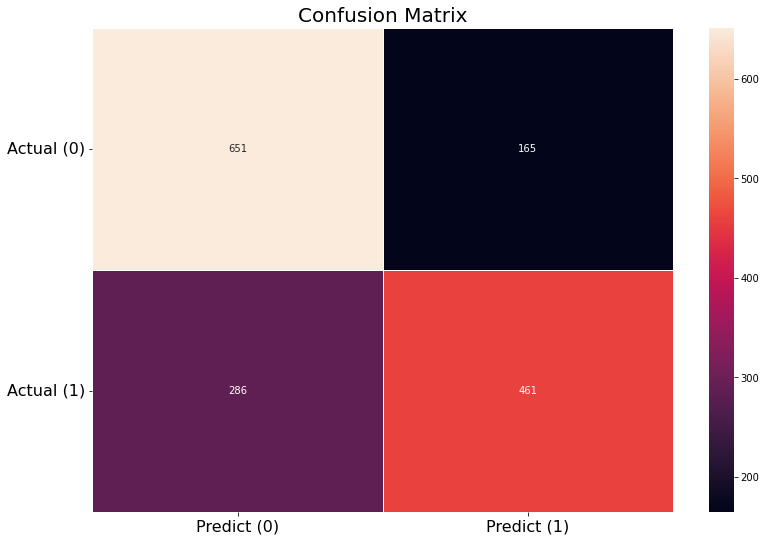

In [125]:
ypreds=gs_rf_best.predict(xtest)
conf_matrix = confusion_matrix(ytest, ypreds)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(['Predict (0)','Predict (1)'],fontsize=16, rotation=360)
ax.set_yticklabels(['Actual (0)','Actual (1)'], fontsize=16, rotation=360)
plt.show()

1. True Negative (TN - Actual(0)&Predict(0)) : Model memprediksi customer tidak melakukan deposit dan customer tersebut kenyataannya tidak melakukan deposit.
2. True Positive (TP - Actual(1)&Predict(1)) : Model memprediksi customer melakukan deposit dan customer tersebut kenyataannya melakukan deposit.
3. False Negative (FN - Actual(1)&Predict(0)) : Model memprediksi customer tidak melakukan deposit padahal customer tersebut kenyataannya melakukan deposit.
4. False Positive (FP - Actual(0)&Predict(1)) : Model memprediksi customer melakukan deposit padahal customer tersebut kenyataannya tidak melakukan deposit.

####  2. Metric Evaluation

In [126]:
print(classification_report(ytest,ypreds))

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       816
           1       0.74      0.62      0.67       747

    accuracy                           0.71      1563
   macro avg       0.72      0.71      0.71      1563
weighted avg       0.71      0.71      0.71      1563



Untuk mengevaluasi digunakan metric evaluation F1-Score yang merupakan harmonisasi dari precision & recall. Evaluasi tidak menggunakan precision ataupun recall dikarenakan keduanya saling trade off, kurang tepat jika memilih salah satunya saja. Ketika recall sangat tinggi, precision bisa jadi sangat rendah, begitupun sebaliknya.

# Features Importance

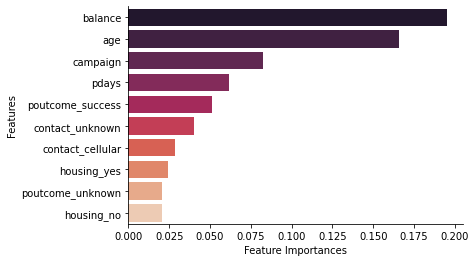

In [127]:
importances= gs_rf_best.feature_importances_
feature_importances= pd.Series(importances, index=xtrain.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10], palette="rocket")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

# Conclusion & Recommedation

1. Model yang bisa diterapkan untuk memprediksi dilakukan atau tidaknya deposit oleh customer adalah model Random Forest
2. Berdasarkan hasil EDA, dapat disarankan bank melakukan campaign ke customer pada bulan-bulan mei, agustus & juli. Hal ini dikarenakan pada bulan-bulan tersebut customer banyak merespons terkait campaign terakhir. Dan sebaliknya, bank menghindari bulan september, maret & desember dalma melakukan campaign karena pada bulan tersebut respon customer terhadap campaign sangat sedikit.
3. Bank disarankan untuk tidak mengontak customer terlalu banyak terkait campaign, karena semakin banyak kontak yang dilakukan terhadap customer semakin kecil kemungkinan customer melakukan deposit. Hal ini terlihat pada correlation matrix pada bagian EDA
4. Range usia terbanyak dari customer bank adalah 26-50 thn , disarankan bank dapat melakukan campaign yang lebih mengikuti lifestyle dari customer dengan range tersebut
3. Berdasarkan feature importance dari model random forest, dapat kita lihat bahwa variabel yang paling berpengaruh adalah balance, age, campaign & pday

In [130]:
# Import pickle
gs_rf.best_estimator_.fit(xtrain,ytrain) # FINAL MODEL
filename = 'Model Final.sav'
pickle.dump(gs_rf.best_estimator_,open(filename,'wb'))

# THANKYOU